## **SOLO LO HICE PARA PCA**

Lo hice para PCA en R2 y en R3

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from pathlib import Path

In [42]:
rc_params = {
    "figure.figsize": (10, 8),
    "axes.titlesize": 24,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.grid": True,
    "grid.color": "0.85",
    "grid.linestyle": "-",
    "legend.title_fontsize": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 8
}

sns.set_theme(style="whitegrid", context="notebook", palette="tab10", rc=rc_params)


In [43]:
from scripts.cargar_datos_cifar import *

In [ ]:
cifar100_path = Path("../datos/cifar-10-batches-py")
resultados_path = Path("../resultados/01-PCA")

In [45]:
clases = ['bird', 'automobile', 'cat', 'deer']

In [46]:
X, y, fine_label_names, data_dict, meta_dict = clases_cifar(cifar100_path, clases)

# **PCA R2**

In [47]:
# Pipeline: escalado + PCA
pipeline_2 = Pipeline([
    ('pca', PCA(n_components=2))
])

In [48]:
# Ajustar PCA y transformar
X_pca_2= pipeline_2.fit_transform(X)

In [49]:
# Guardar los resultados en un DataFrame
df_pca_2 = pd.DataFrame({
    'x_1': X_pca_2[:, 0],
    'x_2': X_pca_2[:, 1],
    'Clase': [fine_label_names[i] for i in y]
})

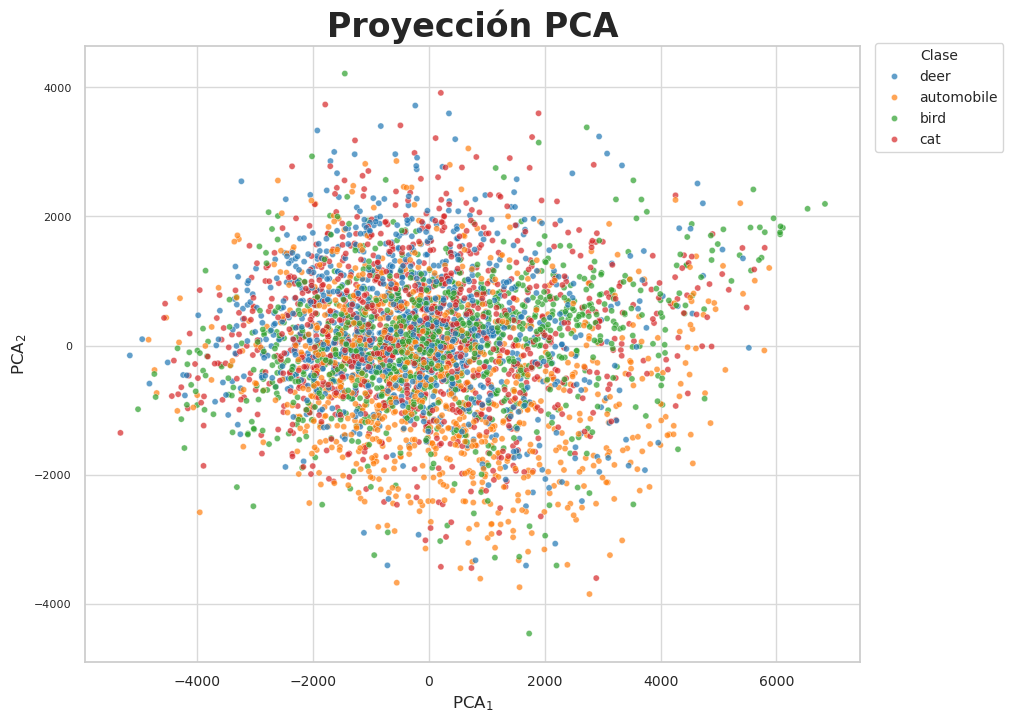

In [ ]:
# Hacer un gráfico de dispersión
plt.figure()
sns.scatterplot(data=df_pca_2, x='x_1', y='x_2', hue='Clase', alpha=0.7, s=20)
plt.title("Proyección PCA") 
plt.xlabel(r'$\text{PCA}_1$')
plt.ylabel(r'$\text{PCA}_2$')
plt.legend(title='Clase', bbox_to_anchor=(1.01, 1.015), loc='upper left')
plt.savefig(resultados_path / 'PCA-R2.svg', bbox_inches='tight')
plt.show()

In [51]:
pipeline_2.named_steps['pca'].explained_variance_ratio_

array([0.29457639, 0.10469999])

# **PCA R3**

In [52]:
# Pipeline: escalado + PCA
pipeline_3 = Pipeline([
    ('pca', PCA(n_components=3))
])

In [53]:
# Ajustar PCA y transformar
X_pca_3 = pipeline_3.fit_transform(X)

In [54]:
# Guardar los resultados en un DataFrame
df_pca_3 = pd.DataFrame({
    'x_1': X_pca_3[:, 0],
    'x_2': X_pca_3[:, 1],
    'x_3': X_pca_3[:, 2],
    'Clase': [fine_label_names[i] for i in y]
})

In [ ]:
fig = go.Figure()

for i, clase in enumerate(clases):
    mask = df_pca_3['Clase'] == clase
    fig.add_trace(go.Scatter3d(
        x=df_pca_3.loc[mask, 'x_1'],
        y=df_pca_3.loc[mask, 'x_2'],
        z=df_pca_3.loc[mask, 'x_3'],
        mode='markers',
        marker=dict(size=1.2, opacity=0.5),
        name=clase
    ))

fig.update_layout(
    title='Proyección PCA',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        xaxis=dict(backgroundcolor='rgba(22,22,22,0)'),
        yaxis=dict(backgroundcolor='rgba(0,0,0,0)'),
        zaxis=dict(backgroundcolor='rgba(0,0,0,0)')
    ),
    legend_title='Clase',
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.update_layout(scene_camera=dict(eye=dict(x=2, y=2, z=2)))
fig.update_layout(title_font=dict(size=20, color='black', family='Arial'))

# save as html
fig.write_html(resultados_path / 'PCA-R3.html', include_plotlyjs='cdn')

fig.show()


In [56]:
pipeline_3.named_steps['pca'].explained_variance_ratio_

array([0.29457639, 0.10469999, 0.05795034])

In [57]:
pipeline_3.named_steps['pca'].components_

array([[ 0.02668891,  0.02669207,  0.02679925, ...,  0.02018739,
         0.02052854,  0.0207782 ],
       [-0.01846496, -0.01874608, -0.01934211, ...,  0.02000787,
         0.01901782,  0.01816594],
       [-0.0171167 , -0.01713095, -0.01666004, ..., -0.01945916,
        -0.01917283, -0.01864611]])